<a href="https://colab.research.google.com/github/mahalaxmi-k/Deep-Learning-Labs/blob/main/DL_Lab_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name - K.Mahalaxmi

UGID - 22WU0105013

In [ ]:
# We will use Tensor flow and keras for regularization techniques
# Dense - each neuron is connected to each neuron in the previous layer
# Sequential - arranging layer by layer
# Dataset used - MNIST dataset
# Comparing results with and without regularization techniques
# 70 - training, 30 - testing
# 5 hidden layers with 500 neurons each
# 25% will be dropped in drop out layer
# Early stopping - done by an additional parameter , callback

Lab Module 2 Question: Regularization Techniques in Deep Learning
Objective: To explore and implement various regularization techniques to prevent overfitting in a deep learning model.


1.Baseline Model:
- Build and train a baseline model without any regularization.
- Record training and validation accuracy, loss, and observe overfitting symptoms (if any).

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.8516 - loss: 0.5113 - val_accuracy: 0.9567 - val_loss: 0.1423
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9616 - loss: 0.1260 - val_accuracy: 0.9708 - val_loss: 0.0990
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.9756 - loss: 0.0790 - val_accuracy: 0.9706 - val_loss: 0.0964
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9811 - loss: 0.0622 - val_accuracy: 0.9719 - val_loss: 0.0884
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9865 - loss: 0.0426 - val_accuracy: 0.9752 - val_loss: 0.0798
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.9888 - loss: 0.0365 - val_accuracy: 0.9728 - val_loss: 0.0859
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9914 - loss: 0.0275 - val_accuracy: 0.9789 - val_loss: 0.0719
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9931 - loss: 0.0213 - val_accuracy: 0

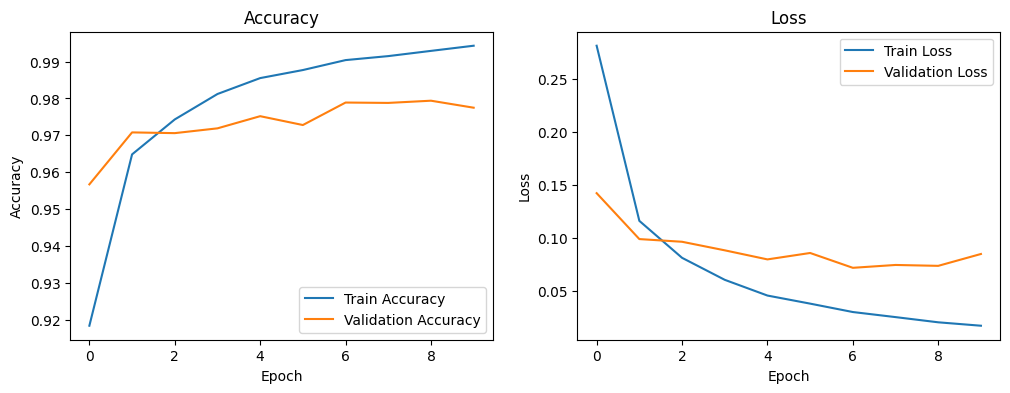

Training Accuracy: 0.9958, Training Loss: 0.0137
Validation Accuracy: 0.9775, Validation Loss: 0.0849


In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize the data
x_train = x_train / 255.0
x_test = x_test / 255.0

# Convert labels to one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Define the baseline model
def create_baseline_model():
    model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(128, activation='relu'),
        Dense(64, activation='relu'),
        Dense(10, activation='softmax')
    ])
    return model

# Compile the model
baseline_model = create_baseline_model()
baseline_model.compile(optimizer=Adam(),
                       loss='categorical_crossentropy',
                       metrics=['accuracy'])

# Train the model
history = baseline_model.fit(x_train, y_train,
                              validation_data=(x_test, y_test),
                              epochs=10,
                              batch_size=64,
                              verbose=1)

# Plot training and validation accuracy/loss
plt.figure(figsize=(12, 4))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Evaluate the model
train_loss, train_acc = baseline_model.evaluate(x_train, y_train, verbose=0)
val_loss, val_acc = baseline_model.evaluate(x_test, y_test, verbose=0)

print(f"Training Accuracy: {train_acc:.4f}, Training Loss: {train_loss:.4f}")
print(f"Validation Accuracy: {val_acc:.4f}, Validation Loss: {val_loss:.4f}")


L1 and L2 Regularization:
Modify the baseline model by applying L1 and L2 regularization (individually and together).
Experiment with different regularization strengths (e.g., λ = 0.01, 0.1, 0.5) and evaluate their impact on model performance.



Training model with L1 regularization (λ=0.01)
Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.4288 - loss: 9.6454 - val_accuracy: 0.5331 - val_loss: 1.9506
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.5439 - loss: 1.9292 - val_accuracy: 0.5923 - val_loss: 1.8280
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.5895 - loss: 1.8312 - val_accuracy: 0.6268 - val_loss: 1.7637
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.6208 - loss: 1.7740 - val_accuracy: 0.6513 - val_loss: 1.7183
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.6464 - loss: 1.7324 - val_accuracy: 0.6522 - val_loss: 1.7004
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6619 - loss: 1.6924 - val_accuracy: 0.6632 - val_loss: 1.6692
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.6722 - loss: 1.6743 - val_accuracy: 0.7007 - val_loss: 1.6321
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - a

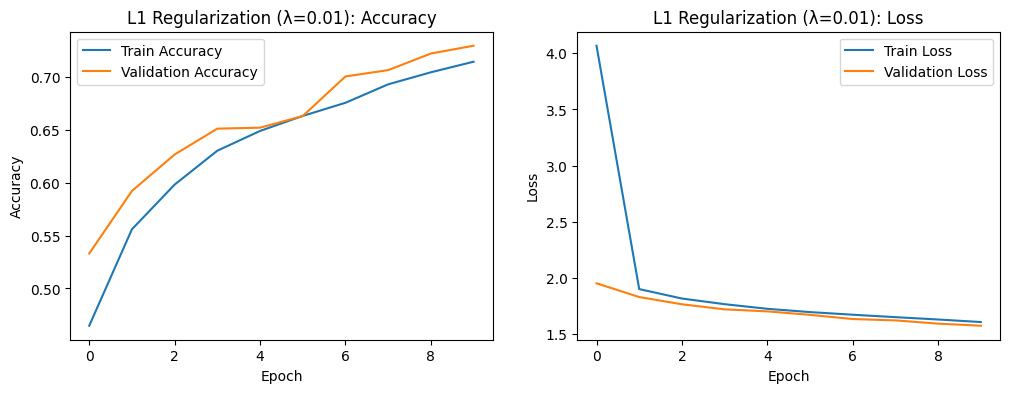


Training model with L1 regularization (λ=0.1)
Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.1221 - loss: 73.8311 - val_accuracy: 0.1135 - val_loss: 3.6242
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.1104 - loss: 3.6224 - val_accuracy: 0.1135 - val_loss: 3.6201
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.1134 - loss: 3.6223 - val_accuracy: 0.1135 - val_loss: 3.6361
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.1126 - loss: 3.6222 - val_accuracy: 0.1135 - val_loss: 3.6243
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.1104 - loss: 3.6226 - val_accuracy: 0.1135 - val_loss: 3.6184
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.1129 - loss: 3.6226 - val_accuracy: 0.1135 - val_loss: 3.6260
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.1137 - loss: 3.6222 - val_accuracy: 0.1135 - val_loss: 3.6182
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - a

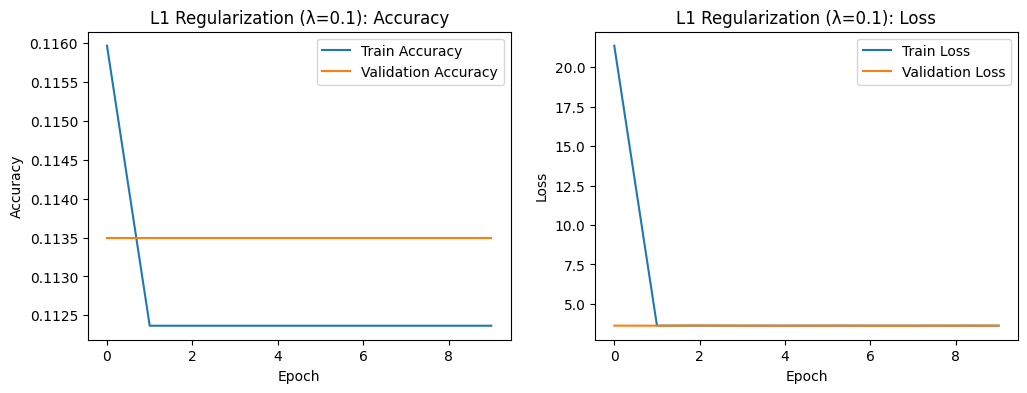


Training model with L1 regularization (λ=0.5)
Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.1207 - loss: 362.1405 - val_accuracy: 0.1135 - val_loss: 9.0162
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.1144 - loss: 9.0536 - val_accuracy: 0.1135 - val_loss: 9.0544
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.1135 - loss: 9.0560 - val_accuracy: 0.1135 - val_loss: 9.1238
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.1120 - loss: 9.0549 - val_accuracy: 0.1135 - val_loss: 9.0579
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.1126 - loss: 9.0538 - val_accuracy: 0.1135 - val_loss: 9.0329
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.1130 - loss: 9.0540 - val_accuracy: 0.1135 - val_loss: 9.0775
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.1147 - loss: 9.0548 - val_accuracy: 0.1135 - val_loss: 9.0598
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - 

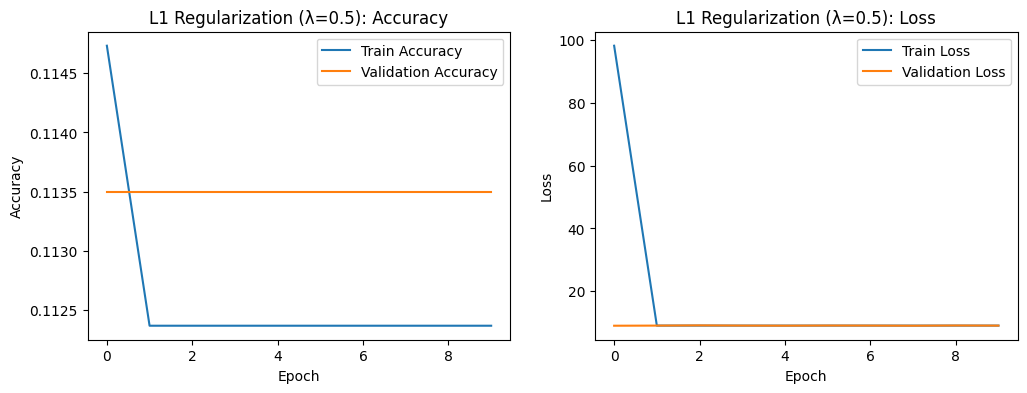


Training model with L2 regularization (λ=0.01)
Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.8334 - loss: 1.7270 - val_accuracy: 0.9134 - val_loss: 0.8028
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9097 - loss: 0.8082 - val_accuracy: 0.9105 - val_loss: 0.7830
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9085 - loss: 0.7912 - val_accuracy: 0.9120 - val_loss: 0.7754
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9111 - loss: 0.7827 - val_accuracy: 0.9161 - val_loss: 0.7556
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.9126 - loss: 0.7731 - val_accuracy: 0.9163 - val_loss: 0.7531
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9134 - loss: 0.7713 - val_accuracy: 0.9191 - val_loss: 0.7535
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.9102 - loss: 0.7727 - val_accuracy: 0.9167 - val_loss: 0.7489
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - a

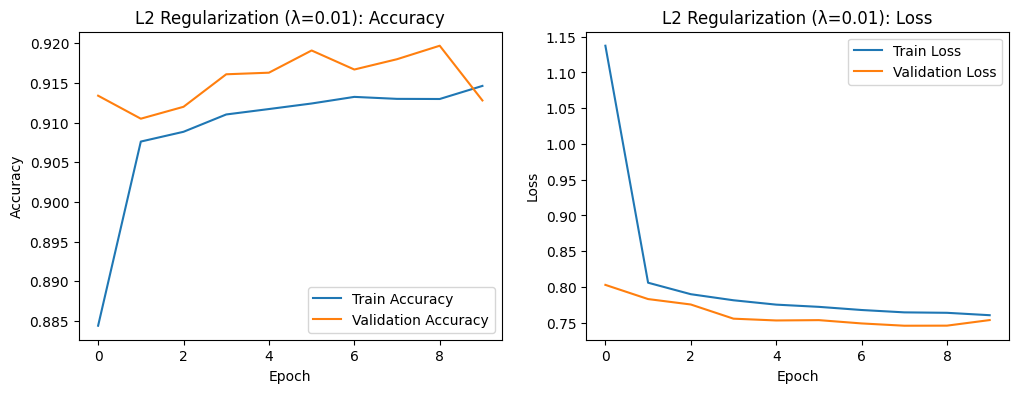


Training model with L2 regularization (λ=0.1)
Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.5893 - loss: 6.7684 - val_accuracy: 0.5547 - val_loss: 2.2737
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.5578 - loss: 2.2778 - val_accuracy: 0.5797 - val_loss: 2.2526
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.5664 - loss: 2.2587 - val_accuracy: 0.5790 - val_loss: 2.2363
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.5726 - loss: 2.2575 - val_accuracy: 0.5766 - val_loss: 2.2345
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.5748 - loss: 2.2582 - val_accuracy: 0.5897 - val_loss: 2.2319
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.5785 - loss: 2.2582 - val_accuracy: 0.6098 - val_loss: 2.2371
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.5833 - loss: 2.2518 - val_accuracy: 0.5950 - val_loss: 2.2345
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - ac

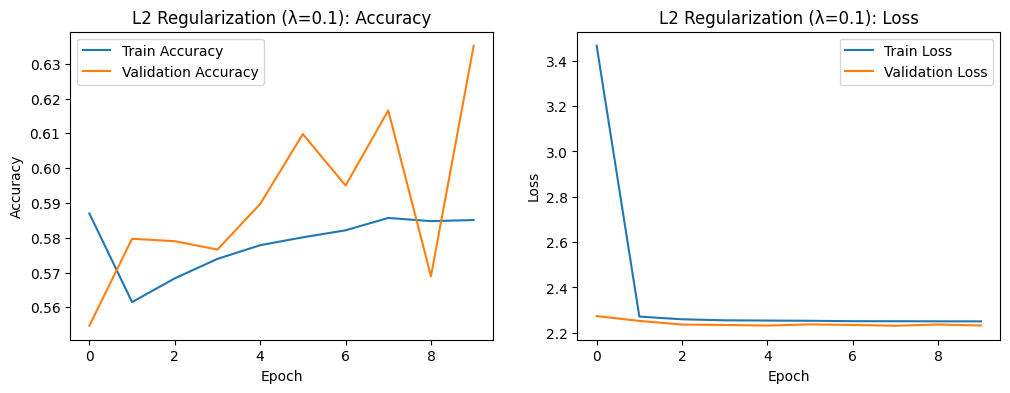


Training model with L2 regularization (λ=0.5)
Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.2193 - loss: 24.5592 - val_accuracy: 0.1135 - val_loss: 2.3011
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.1151 - loss: 2.3011 - val_accuracy: 0.1135 - val_loss: 2.3012
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.1135 - loss: 2.3012 - val_accuracy: 0.1135 - val_loss: 2.3011
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.1133 - loss: 2.3015 - val_accuracy: 0.1135 - val_loss: 2.3012
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.1114 - loss: 2.3015 - val_accuracy: 0.1135 - val_loss: 2.3011
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.1131 - loss: 2.3013 - val_accuracy: 0.1135 - val_loss: 2.3010
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.1137 - loss: 2.3010 - val_accuracy: 0.1135 - val_loss: 2.3011
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - a

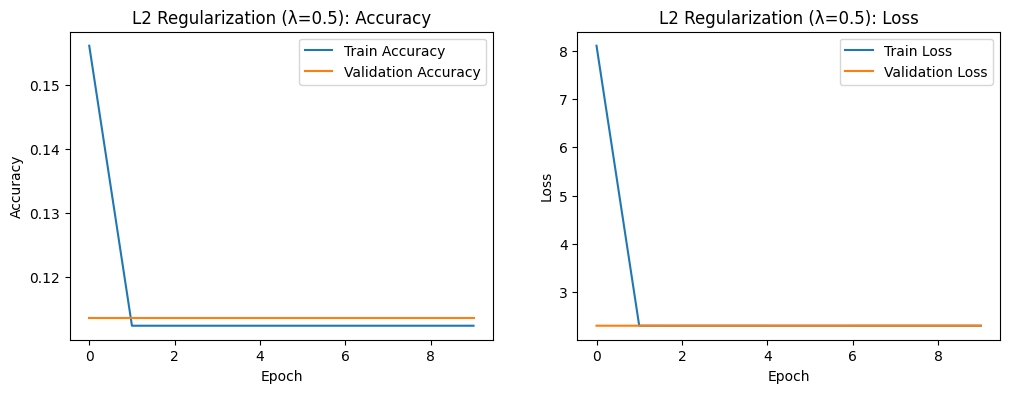


Training model with L1_L2 regularization (λ=0.01)
Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.4941 - loss: 9.6160 - val_accuracy: 0.6939 - val_loss: 1.9427
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.7052 - loss: 1.9086 - val_accuracy: 0.7648 - val_loss: 1.7606
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7768 - loss: 1.7267 - val_accuracy: 0.8233 - val_loss: 1.5919
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.8206 - loss: 1.5908 - val_accuracy: 0.8376 - val_loss: 1.5221
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8343 - loss: 1.5268 - val_accuracy: 0.8397 - val_loss: 1.4799
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.8383 - loss: 1.4778 - val_accuracy: 0.8500 - val_loss: 1.4414
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8438 - loss: 1.4345 - val_accuracy: 0.8502 - val_loss: 1.3823
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step 

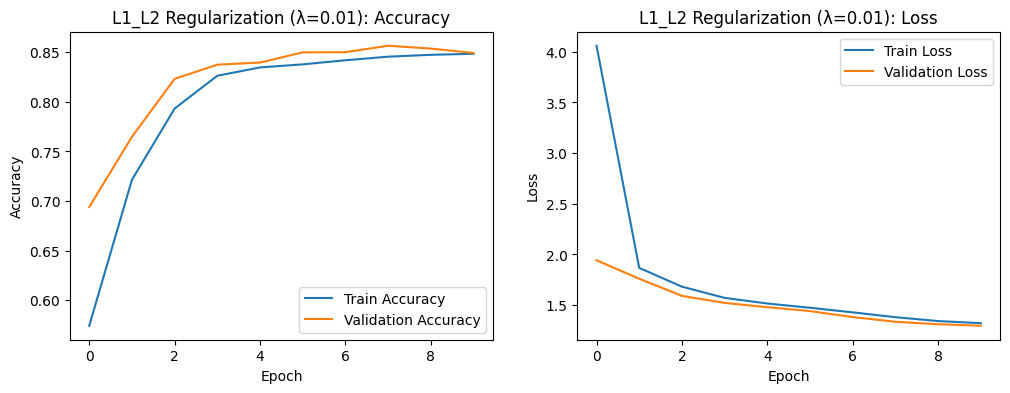


Training model with L1_L2 regularization (λ=0.1)
Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.1091 - loss: 74.3555 - val_accuracy: 0.1135 - val_loss: 3.6260
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.1104 - loss: 3.6328 - val_accuracy: 0.1135 - val_loss: 3.6328
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.1123 - loss: 3.6326 - val_accuracy: 0.1135 - val_loss: 3.6425
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.1149 - loss: 3.6326 - val_accuracy: 0.1135 - val_loss: 3.6332
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.1123 - loss: 3.6327 - val_accuracy: 0.1135 - val_loss: 3.6279
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.1127 - loss: 3.6329 - val_accuracy: 0.1135 - val_loss: 3.6312
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.1142 - loss: 3.6326 - val_accuracy: 0.1135 - val_loss: 3.6293
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step

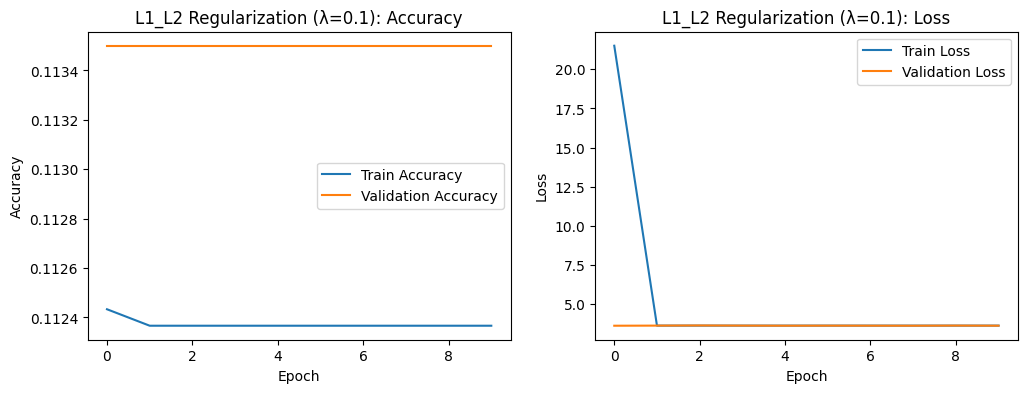


Training model with L1_L2 regularization (λ=0.5)
Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.1103 - loss: 361.8290 - val_accuracy: 0.1135 - val_loss: 9.0511
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.1144 - loss: 9.0429 - val_accuracy: 0.1135 - val_loss: 9.0232
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.1115 - loss: 9.0451 - val_accuracy: 0.1135 - val_loss: 9.0973
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.1131 - loss: 9.0440 - val_accuracy: 0.1135 - val_loss: 9.0841
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.1109 - loss: 9.0441 - val_accuracy: 0.1135 - val_loss: 8.9859
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.1134 - loss: 9.0432 - val_accuracy: 0.1135 - val_loss: 9.0644
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.1130 - loss: 9.0445 - val_accuracy: 0.1135 - val_loss: 9.0597
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step 

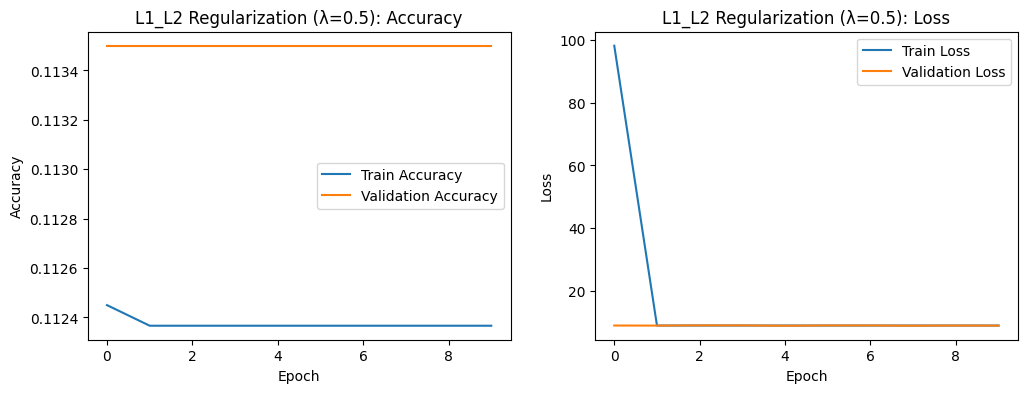


L1 Regularization (λ=0.01):
Training Accuracy: 0.7230, Training Loss: 1.5904
Validation Accuracy: 0.7298, Validation Loss: 1.5725

L1 Regularization (λ=0.1):
Training Accuracy: 0.1124, Training Loss: 3.6207
Validation Accuracy: 0.1135, Validation Loss: 3.6206

L1 Regularization (λ=0.5):
Training Accuracy: 0.1124, Training Loss: 9.0494
Validation Accuracy: 0.1135, Validation Loss: 9.0493

L2 Regularization (λ=0.01):
Training Accuracy: 0.9137, Training Loss: 0.7626
Validation Accuracy: 0.9128, Validation Loss: 0.7536

L2 Regularization (λ=0.1):
Training Accuracy: 0.6320, Training Loss: 2.2438
Validation Accuracy: 0.6352, Validation Loss: 2.2323

L2 Regularization (λ=0.5):
Training Accuracy: 0.1124, Training Loss: 2.3012
Validation Accuracy: 0.1135, Validation Loss: 2.3012

L1_L2 Regularization (λ=0.01):
Training Accuracy: 0.8491, Training Loss: 1.3112
Validation Accuracy: 0.8494, Validation Loss: 1.2971

L1_L2 Regularization (λ=0.1):
Training Accuracy: 0.1124, Training Loss: 3.6281
Vali

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l1, l2, l1_l2
import matplotlib.pyplot as plt

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize the data
x_train = x_train / 255.0
x_test = x_test / 255.0

# Convert labels to one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Define the model with L1, L2, or L1_L2 regularization
def create_regularized_model(regularizer):
    model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(128, activation='relu', kernel_regularizer=regularizer),
        Dense(64, activation='relu', kernel_regularizer=regularizer),
        Dense(10, activation='softmax', kernel_regularizer=regularizer)
    ])
    return model

# Experiment with different regularization strengths
regularization_strengths = [0.01, 0.1, 0.5]
regularizers = {
    "L1": l1,
    "L2": l2,
    "L1_L2": l1_l2
}

results = {}

for reg_name, reg_fn in regularizers.items():
    for strength in regularization_strengths:
        print(f"\nTraining model with {reg_name} regularization (λ={strength})")

        # Create and compile the model
        model = create_regularized_model(reg_fn(strength))
        model.compile(optimizer=Adam(),
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])

        # Train the model
        history = model.fit(x_train, y_train,
                            validation_data=(x_test, y_test),
                            epochs=10,
                            batch_size=64,
                            verbose=1)

        # Evaluate the model
        train_loss, train_acc = model.evaluate(x_train, y_train, verbose=0)
        val_loss, val_acc = model.evaluate(x_test, y_test, verbose=0)

        # Store results
        results[(reg_name, strength)] = {
            "train_loss": train_loss,
            "train_acc": train_acc,
            "val_loss": val_loss,
            "val_acc": val_acc
        }

        # Plot training and validation accuracy/loss
        plt.figure(figsize=(12, 4))

        # Accuracy
        plt.subplot(1, 2, 1)
        plt.plot(history.history['accuracy'], label='Train Accuracy')
        plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
        plt.title(f'{reg_name} Regularization (λ={strength}): Accuracy')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.legend()

        # Loss
        plt.subplot(1, 2, 2)
        plt.plot(history.history['loss'], label='Train Loss')
        plt.plot(history.history['val_loss'], label='Validation Loss')
        plt.title(f'{reg_name} Regularization (λ={strength}): Loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()

        plt.show()

# Print summarized results
for key, result in results.items():
    reg_name, strength = key
    print(f"\n{reg_name} Regularization (λ={strength}):")
    print(f"Training Accuracy: {result['train_acc']:.4f}, Training Loss: {result['train_loss']:.4f}")
    print(f"Validation Accuracy: {result['val_acc']:.4f}, Validation Loss: {result['val_loss']:.4f}")


Dropout:
Introduce dropout layers into your model architecture.
Experiment with different dropout rates (e.g., 0.2, 0.5) and observe how it affects overfitting and model performance.


Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7975 - loss: 0.6655 - val_accuracy: 0.9500 - val_loss: 0.1638
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9431 - loss: 0.1902 - val_accuracy: 0.9664 - val_loss: 0.1061
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9562 - loss: 0.1424 - val_accuracy: 0.9712 - val_loss: 0.0933
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.9662 - loss: 0.1124 - val_accuracy: 0.9727 - val_loss: 0.0849
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9699 - loss: 0.0964 - val_accuracy: 0.9738 - val_loss: 0.0805
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9738 - loss: 0.0845 - val_accuracy: 0.9772 - val_loss: 0.0762
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9769 - loss: 0.0754 - val_accuracy: 0.9773 - val_loss: 0.0757
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9772 - loss: 0.0731 - val_accuracy: 

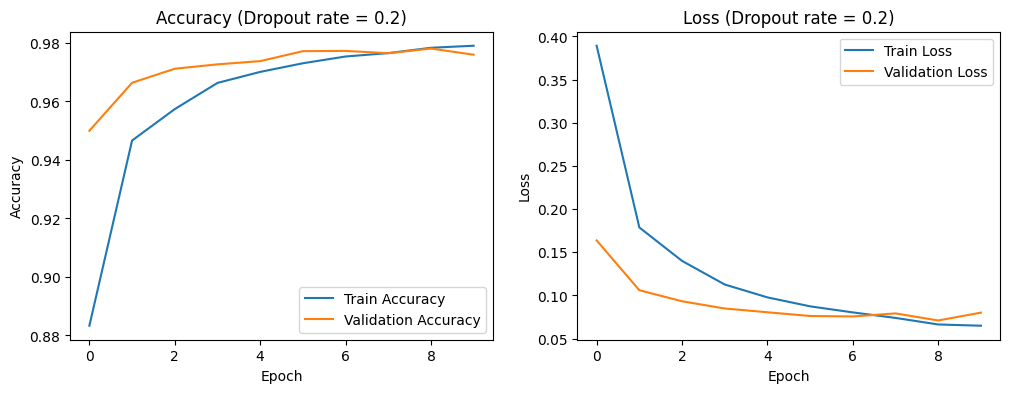

Training Accuracy: 0.9918, Training Loss: 0.0275
Validation Accuracy: 0.9760, Validation Loss: 0.0801


In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize the data
x_train = x_train / 255.0
x_test = x_test / 255.0

# Convert labels to one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Define the model with dropout
def create_model_with_dropout(dropout_rate):
    model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(128, activation='relu'),
        Dropout(dropout_rate),  # Add dropout layer after the first Dense layer
        Dense(64, activation='relu'),
        Dropout(dropout_rate),  # Add dropout layer after the second Dense layer
        Dense(10, activation='softmax')
    ])
    return model

# Experiment with different dropout rates (e.g., 0.2, 0.5)
dropout_rate = 0.2  # Start with a dropout rate of 0.2

# Create and compile the model
model_with_dropout = create_model_with_dropout(dropout_rate)
model_with_dropout.compile(optimizer=Adam(),
                           loss='categorical_crossentropy',
                           metrics=['accuracy'])

# Train the model
history = model_with_dropout.fit(x_train, y_train,
                                 validation_data=(x_test, y_test),
                                 epochs=10,
                                 batch_size=64,
                                 verbose=1)

# Plot training and validation accuracy/loss
plt.figure(figsize=(12, 4))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title(f'Accuracy (Dropout rate = {dropout_rate})')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title(f'Loss (Dropout rate = {dropout_rate})')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Evaluate the model
train_loss, train_acc = model_with_dropout.evaluate(x_train, y_train, verbose=0)
val_loss, val_acc = model_with_dropout.evaluate(x_test, y_test, verbose=0)

print(f"Training Accuracy: {train_acc:.4f}, Training Loss: {train_loss:.4f}")
print(f"Validation Accuracy: {val_acc:.4f}, Validation Loss: {val_loss:.4f}")


4.Early Stopping:
- Implement early stopping by monitoring validation loss.
- Set appropriate patience and minimum delta values. Compare results with and without early stopping.

Epoch 1/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7998 - loss: 0.6424 - val_accuracy: 0.9487 - val_loss: 0.1635
Epoch 2/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.9447 - loss: 0.1865 - val_accuracy: 0.9657 - val_loss: 0.1106
Epoch 3/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9579 - loss: 0.1412 - val_accuracy: 0.9703 - val_loss: 0.0978
Epoch 4/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9664 - loss: 0.1156 - val_accuracy: 0.9728 - val_loss: 0.0860
Epoch 5/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9697 - loss: 0.1011 - val_accuracy: 0.9747 - val_loss: 0.0839
Epoch 6/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9738 - loss: 0.0870 - val_accuracy: 0.9779 - val_loss: 0.0758
Epoch 7/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9757 - loss: 0.0773 - val_accuracy: 0.9765 - val_loss: 0.0742
Epoch 8/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9779 - loss: 0.0701 - val_accuracy: 

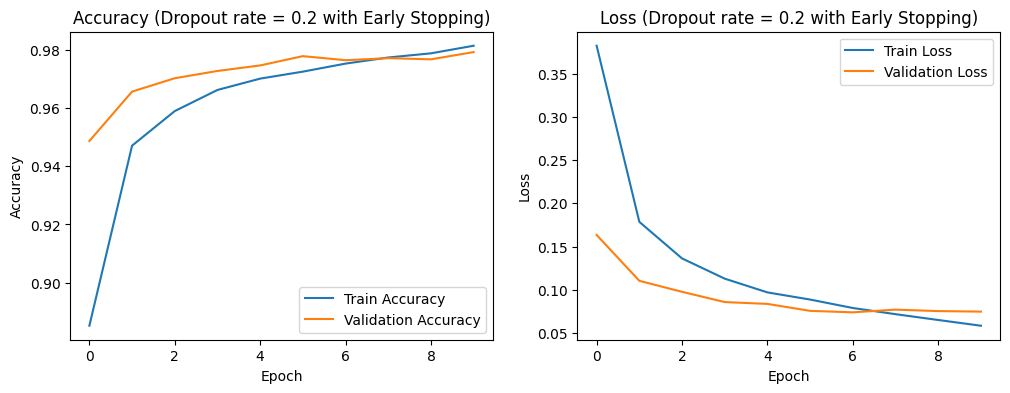

Training Accuracy (with Early Stopping): 0.9899, Training Loss: 0.0341
Validation Accuracy (with Early Stopping): 0.9765, Validation Loss: 0.0742


In [4]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize the data
x_train = x_train / 255.0
x_test = x_test / 255.0

# Convert labels to one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Define the model with dropout
def create_model_with_dropout(dropout_rate):
    model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(128, activation='relu'),
        Dropout(dropout_rate),
        Dense(64, activation='relu'),
        Dropout(dropout_rate),
        Dense(10, activation='softmax')
    ])
    return model

# Define EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss',  # Monitor validation loss
                               patience=3,         # Patience: Wait for 3 epochs without improvement
                               min_delta=0.001,    # Minimum change to be considered as an improvement
                               restore_best_weights=True,  # Restore the best weights after stopping
                               verbose=1)

# Experiment with different dropout rates (e.g., 0.2, 0.5)
dropout_rate = 0.2

# Create and compile the model
model_with_dropout = create_model_with_dropout(dropout_rate)
model_with_dropout.compile(optimizer=Adam(),
                           loss='categorical_crossentropy',
                           metrics=['accuracy'])

# Train the model with early stopping
history_with_early_stopping = model_with_dropout.fit(x_train, y_train,
                                                     validation_data=(x_test, y_test),
                                                     epochs=20,
                                                     batch_size=64,
                                                     callbacks=[early_stopping],
                                                     verbose=1)

# Plot training and validation accuracy/loss with early stopping
plt.figure(figsize=(12, 4))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history_with_early_stopping.history['accuracy'], label='Train Accuracy')
plt.plot(history_with_early_stopping.history['val_accuracy'], label='Validation Accuracy')
plt.title(f'Accuracy (Dropout rate = {dropout_rate} with Early Stopping)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history_with_early_stopping.history['loss'], label='Train Loss')
plt.plot(history_with_early_stopping.history['val_loss'], label='Validation Loss')
plt.title(f'Loss (Dropout rate = {dropout_rate} with Early Stopping)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Evaluate the model
train_loss, train_acc = model_with_dropout.evaluate(x_train, y_train, verbose=0)
val_loss, val_acc = model_with_dropout.evaluate(x_test, y_test, verbose=0)

print(f"Training Accuracy (with Early Stopping): {train_acc:.4f}, Training Loss: {train_loss:.4f}")
print(f"Validation Accuracy (with Early Stopping): {val_acc:.4f}, Validation Loss: {val_loss:.4f}")


In [5]:
# Train the model without early stopping for comparison
history_without_early_stopping = model_with_dropout.fit(x_train, y_train,
                                                        validation_data=(x_test, y_test),
                                                        epochs=20,
                                                        batch_size=64,
                                                        verbose=1)


Epoch 1/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9776 - loss: 0.0697 - val_accuracy: 0.9783 - val_loss: 0.0775
Epoch 2/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9797 - loss: 0.0661 - val_accuracy: 0.9771 - val_loss: 0.0737
Epoch 3/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9804 - loss: 0.0596 - val_accuracy: 0.9780 - val_loss: 0.0722
Epoch 4/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9816 - loss: 0.0570 - val_accuracy: 0.9808 - val_loss: 0.0717
Epoch 5/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9819 - loss: 0.0542 - val_accuracy: 0.9798 - val_loss: 0.0760
Epoch 6/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9849 - loss: 0.0482 - val_accuracy: 0.9783 - val_loss: 0.0707
Epoch 7/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9839 - loss: 0.0482 - val_accuracy: 0.9793 - val_loss: 0.0724
Epoch 8/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9845 - loss: 0.0483 - val_accuracy: 0

5.Data Augmentation:
- Apply data augmentation techniques (e.g., flipping, rotation, cropping, brightness/contrast adjustment).
- Train the model using augmented data and evaluate its impact on performance.

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


938/938 ━━━━━━━━━━━━━━━━━━━━ 43s 44ms/step - accuracy: 0.1084 - loss: 2.3630 - val_accuracy: 0.1135 - val_loss: 2.3007
Epoch 2/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 82s 44ms/step - accuracy: 0.1106 - loss: 2.3016 - val_accuracy: 0.1135 - val_loss: 2.3013
Epoch 3/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 41s 44ms/step - accuracy: 0.1123 - loss: 2.3014 - val_accuracy: 0.1135 - val_loss: 2.3013
Epoch 4/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 41s 44ms/step - accuracy: 0.1142 - loss: 2.3012 - val_accuracy: 0.1135 - val_loss: 2.3011
Epoch 5/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 41s 44ms/step - accuracy: 0.1107 - loss: 2.3013 - val_accuracy: 0.1135 - val_loss: 2.3011
Epoch 6/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 42s 44ms/step - accuracy: 0.1118 - loss: 2.3013 - val_accuracy: 0.1135 - val_loss: 2.3011
Epoch 7/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 41s 44ms/step - accuracy: 0.1110 - loss: 2.3016 - val_accuracy: 0.1135 - val_loss: 2.3010
Epoch 8/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 41s 44ms/step - accuracy: 0.1108 - loss: 2.3016 - val_accurac

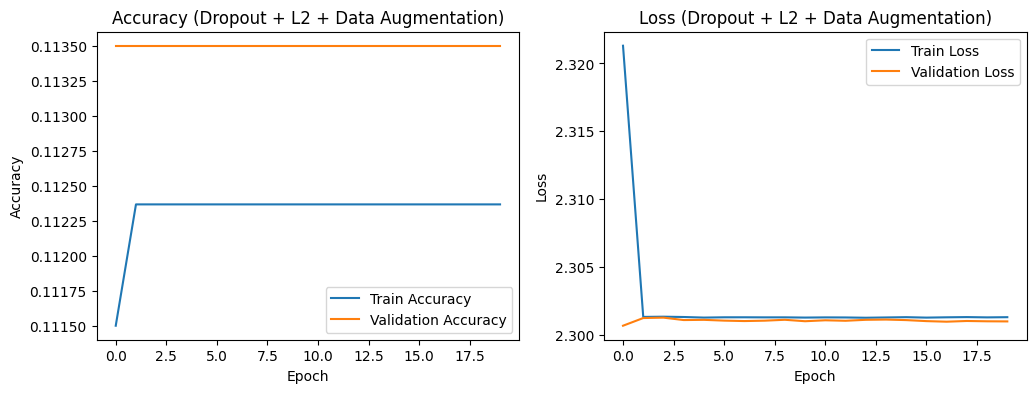

Training Accuracy (with Combined Regularization): 0.1124, Training Loss: 2.3012
Validation Accuracy (with Combined Regularization): 0.1135, Validation Loss: 2.3010


In [7]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize the data
x_train = x_train / 255.0
x_test = x_test / 255.0

# Add channel dimension to the data (grayscale images)
x_train = np.expand_dims(x_train, axis=-1)  # Shape will be (60000, 28, 28, 1)
x_test = np.expand_dims(x_test, axis=-1)    # Shape will be (10000, 28, 28, 1)

# Convert labels to one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Define the model with combined regularization (L2 + Dropout)
def create_model_with_combined_regularization(dropout_rate, l2_lambda):
    model = Sequential([
        Flatten(input_shape=(28, 28, 1)),  # Adjust input shape for grayscale images
        Dense(128, activation='relu', kernel_regularizer=l2(l2_lambda)),  # L2 regularization
        Dropout(dropout_rate),  # Dropout layer
        Dense(64, activation='relu', kernel_regularizer=l2(l2_lambda)),   # L2 regularization
        Dropout(dropout_rate),  # Dropout layer
        Dense(10, activation='softmax')
    ])
    return model

# Apply data augmentation using ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range=20,        # Random rotations from -20 to 20 degrees
    width_shift_range=0.2,    # Randomly translate images horizontally by up to 20%
    height_shift_range=0.2,   # Randomly translate images vertically by up to 20%
    shear_range=0.2,          # Shear images randomly
    zoom_range=0.2,           # Random zoom
    horizontal_flip=True,     # Randomly flip images horizontally
    brightness_range=[0.8, 1.2],  # Randomly adjust brightness
    fill_mode='nearest'       # Strategy to fill in pixels after transformation
)

# Fit the datagen on the training data
datagen.fit(x_train)

# Regularization hyperparameters
dropout_rate = 0.2
l2_lambda = 0.001  # L2 regularization strength

# Create and compile the model with combined regularization
model_with_combined_regularization = create_model_with_combined_regularization(dropout_rate, l2_lambda)
model_with_combined_regularization.compile(optimizer=Adam(),
                                           loss='categorical_crossentropy',
                                           metrics=['accuracy'])

# Train the model using augmented data
history_with_combined_regularization = model_with_combined_regularization.fit(datagen.flow(x_train, y_train, batch_size=64),
                                                                               validation_data=(x_test, y_test),
                                                                               epochs=20,
                                                                               verbose=1)

# Plot training and validation accuracy/loss with combined regularization
plt.figure(figsize=(12, 4))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history_with_combined_regularization.history['accuracy'], label='Train Accuracy')
plt.plot(history_with_combined_regularization.history['val_accuracy'], label='Validation Accuracy')
plt.title(f'Accuracy (Dropout + L2 + Data Augmentation)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history_with_combined_regularization.history['loss'], label='Train Loss')
plt.plot(history_with_combined_regularization.history['val_loss'], label='Validation Loss')
plt.title(f'Loss (Dropout + L2 + Data Augmentation)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Evaluate the model
train_loss, train_acc = model_with_combined_regularization.evaluate(x_train, y_train, verbose=0)
val_loss, val_acc = model_with_combined_regularization.evaluate(x_test, y_test, verbose=0)

print(f"Training Accuracy (with Combined Regularization): {train_acc:.4f}, Training Loss: {train_loss:.4f}")
print(f"Validation Accuracy (with Combined Regularization): {val_acc:.4f}, Validation Loss: {val_loss:.4f}")


6.Combined Regularization:
- Combine two or more regularization techniques (e.g., L2 + Dropout + Data Augmentation).
- Compare the results with individual techniques and the baseline model.

Epoch 1/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 49s 50ms/step - accuracy: 0.1112 - loss: 2.3587 - val_accuracy: 0.0983 - val_loss: 2.2953
Epoch 2/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 42s 45ms/step - accuracy: 0.1142 - loss: 2.3016 - val_accuracy: 0.1205 - val_loss: 2.2678
Epoch 3/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 41s 44ms/step - accuracy: 0.1139 - loss: 2.3016 - val_accuracy: 0.2436 - val_loss: 2.2757
Epoch 4/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 41s 44ms/step - accuracy: 0.1126 - loss: 2.3011 - val_accuracy: 0.1353 - val_loss: 2.2938
Epoch 5/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 42s 45ms/step - accuracy: 0.1122 - loss: 2.3014 - val_accuracy: 0.1145 - val_loss: 2.2735
Epoch 6/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 43s 45ms/step - accuracy: 0.1138 - loss: 2.3015 - val_accuracy: 0.1612 - val_loss: 2.2673
Epoch 7/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 42s 45ms/step - accuracy: 0.1109 - loss: 2.3015 - val_accuracy: 0.0980 - val_loss: 2.2989
Epoch 8/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 42s 44ms/step - accuracy: 0.1128 - loss: 2.3015 - 

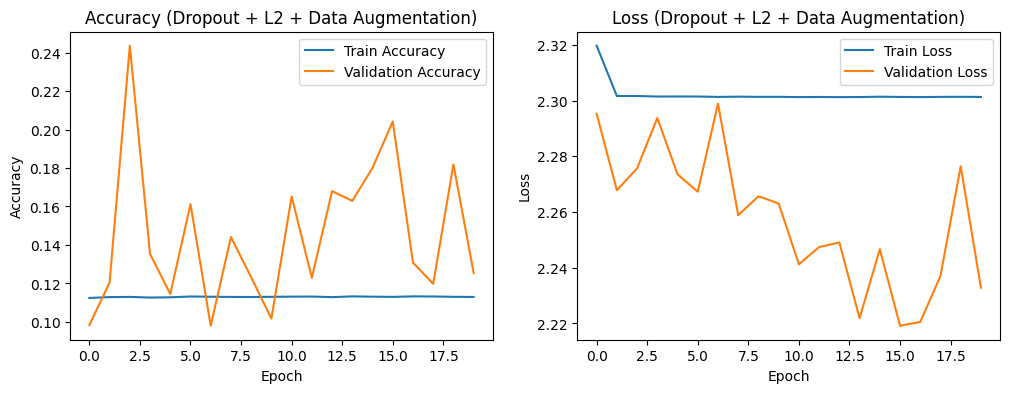

Training Accuracy (with Combined Regularization): 0.1277, Training Loss: 2.2322
Validation Accuracy (with Combined Regularization): 0.1254, Validation Loss: 2.2328


In [10]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize the data
x_train = x_train / 255.0
x_test = x_test / 255.0

# Add channel dimension to the data (grayscale images)
x_train = np.expand_dims(x_train, axis=-1)  # Shape will be (60000, 28, 28, 1)
x_test = np.expand_dims(x_test, axis=-1)    # Shape will be (10000, 28, 28, 1)

# Convert labels to one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Define the model with combined regularization (L2 + Dropout)
def create_model_with_combined_regularization(dropout_rate, l2_lambda):
    model = Sequential([
        Flatten(input_shape=(28, 28, 1)),  # Adjust input shape for grayscale images
        Dense(128, activation='relu', kernel_regularizer=l2(l2_lambda)),  # L2 regularization
        Dropout(dropout_rate),  # Dropout layer
        Dense(64, activation='relu', kernel_regularizer=l2(l2_lambda)),   # L2 regularization
        Dropout(dropout_rate),  # Dropout layer
        Dense(10, activation='softmax')
    ])
    return model

# Apply data augmentation using ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range=20,        # Random rotations from -20 to 20 degrees
    width_shift_range=0.2,    # Randomly translate images horizontally by up to 20%
    height_shift_range=0.2,   # Randomly translate images vertically by up to 20%
    shear_range=0.2,          # Shear images randomly
    zoom_range=0.2,           # Random zoom
    horizontal_flip=True,     # Randomly flip images horizontally
    brightness_range=[0.8, 1.2],  # Randomly adjust brightness
    fill_mode='nearest'       # Strategy to fill in pixels after transformation
)

# Fit the datagen on the training data
datagen.fit(x_train)

# Regularization hyperparameters
dropout_rate = 0.2
l2_lambda = 0.001  # L2 regularization strength

# Create and compile the model with combined regularization
model_with_combined_regularization = create_model_with_combined_regularization(dropout_rate, l2_lambda)
model_with_combined_regularization.compile(optimizer=Adam(),
                                           loss='categorical_crossentropy',
                                           metrics=['accuracy'])

# Train the model using augmented data
history_with_combined_regularization = model_with_combined_regularization.fit(datagen.flow(x_train, y_train, batch_size=64),
                                                                               validation_data=(x_test, y_test),
                                                                               epochs=20,
                                                                               verbose=1)

# Plot training and validation accuracy/loss with combined regularization
plt.figure(figsize=(12, 4))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history_with_combined_regularization.history['accuracy'], label='Train Accuracy')
plt.plot(history_with_combined_regularization.history['val_accuracy'], label='Validation Accuracy')
plt.title(f'Accuracy (Dropout + L2 + Data Augmentation)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history_with_combined_regularization.history['loss'], label='Train Loss')
plt.plot(history_with_combined_regularization.history['val_loss'], label='Validation Loss')
plt.title(f'Loss (Dropout + L2 + Data Augmentation)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Evaluate the model
train_loss, train_acc = model_with_combined_regularization.evaluate(x_train, y_train, verbose=0)
val_loss, val_acc = model_with_combined_regularization.evaluate(x_test, y_test, verbose=0)

print(f"Training Accuracy (with Combined Regularization): {train_acc:.4f}, Training Loss: {train_loss:.4f}")
print(f"Validation Accuracy (with Combined Regularization): {val_acc:.4f}, Validation Loss: {val_loss:.4f}")
